In [56]:
import pandas as pd
import pandas_profiling as pf
from scipy.io.arff import loadarff
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x000001B5DFEDCA60>
Traceback (most recent call last):
  File "C:\Users\Oscar Paredez\AppData\Roaming\Python\Python39\site-packages\llvmlite\binding\executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


In [ ]:
raw_data = loadarff('datasets/KDDTrain+.arff')
df = pd.DataFrame(raw_data[0])
pd.set_option('display.max_columns', None)
df.head()

duration protocol_type      service   flag  src_bytes  dst_bytes  land  \
0       0.0        b'tcp'  b'ftp_data'  b'SF'      491.0        0.0  b'0'   
1       0.0        b'udp'     b'other'  b'SF'      146.0        0.0  b'0'   
2       0.0        b'tcp'   b'private'  b'S0'        0.0        0.0  b'0'   
3       0.0        b'tcp'      b'http'  b'SF'      232.0     8153.0  b'0'   
4       0.0        b'tcp'      b'http'  b'SF'      199.0      420.0  b'0'   

   wrong_fragment  urgent  hot  num_failed_logins logged_in  num_compromised  \
0             0.0     0.0  0.0                0.0      b'0'              0.0   
1             0.0     0.0  0.0                0.0      b'0'              0.0   
2             0.0     0.0  0.0                0.0      b'0'              0.0   
3             0.0     0.0  0.0                0.0      b'1'              0.0   
4             0.0     0.0  0.0                0.0      b'1'              0.0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0         0.0           0.0       0.0                 0.0         0.0   
1         0.0           0.0       0.0                 0.0         0.0   
2         0.0           0.0       0.0                 0.0         0.0   
3         0.0           0.0       0.0                 0.0         0.0   
4         0.0           0.0       0.0                 0.0         0.0   

   num_access_files  num_outbound_cmds is_host_login is_guest_login  count  \
0               0.0                0.0          b'0'           b'0'    2.0   
1               0.0                0.0          b'0'           b'0'   13.0   
2               0.0                0.0          b'0'           b'0'  123.0   
3               0.0                0.0          b'0'           b'0'    5.0   
4               0.0                0.0          b'0'           b'0'   30.0   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0        2.0          0.0              0.0          0.0              0.0   
1        1.0          0.0              0.0          0.0              0.0   
2        6.0          1.0              1.0          0.0              0.0   
3        5.0          0.2              0.2          0.0              0.0   
4       32.0          0.0              0.0          0.0              0.0   

   same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  \
0           1.00           0.00                0.00           150.0   
1           0.08           0.15                0.00           255.0   
2           0.05           0.07                0.00           255.0   
3           1.00           0.00                0.00            30.0   
4           1.00           0.00                0.09           255.0   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                25.0                    0.17                    0.03   
1                 1.0                    0.00                    0.60   
2                26.0                    0.10                    0.05   
3               255.0                    1.00                    0.00   
4               255.0                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

# Exploratory

## Filtering data

In [ ]:
toNumericCols = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
df[toNumericCols] = df[toNumericCols].apply(pd.to_numeric, errors='coerce')

In [ ]:
str_df = df.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()
str_df.head()

protocol_type   service flag    class
0           tcp  ftp_data   SF   normal
1           udp     other   SF   normal
2           tcp   private   S0  anomaly
3           tcp      http   SF   normal
4           tcp      http   SF   normal

In [ ]:
for column in str_df.columns: df[column] = str_df[column]
df.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0     0   
1       0.0           udp     other   SF      146.0        0.0     0   
2       0.0           tcp   private   S0        0.0        0.0     0   
3       0.0           tcp      http   SF      232.0     8153.0     0   
4       0.0           tcp      http   SF      199.0      420.0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0     0.0  0.0  ...               255.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    class  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  anomaly  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [ ]:
def checkAttack(value):
  if value == 'normal': return 0
  return 1

numeric_data = df.select_dtypes(include=np.number)
numeric_data["isAttack"] = str_df["class"].apply(checkAttack)
numeric_data.astype(np.number)
numeric_data.head()

c:\Users\andre\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0      491.0        0.0     0             0.0     0.0  0.0   
1       0.0      146.0        0.0     0             0.0     0.0  0.0   
2       0.0        0.0        0.0     0             0.0     0.0  0.0   
3       0.0      232.0     8153.0     0             0.0     0.0  0.0   
4       0.0      199.0      420.0     0             0.0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  ...  dst_host_srv_count  \
0                0.0          0              0.0  ...                25.0   
1                0.0          0              0.0  ...                 1.0   
2                0.0          0              0.0  ...                26.0   
3                0.0          1              0.0  ...               255.0   
4                0.0          1              0.0  ...               255.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  isAttack  
0                      0.00         0  
1                      0.00         0  
2                      0.00         1  
3                      0.01         0  
4                      0.00         0  

[5 rows x 39 columns]

## Cuantitativas

In [ ]:
numeric_data.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125973.000000    125973.000000  ...       125973.000000   
mean        0.395736         0.279250  ...          115.653005   
std         0.489010        23.942042  ...          110.702741   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125973.000000           125973.000000   
mean                 0.521242                0.082951   
std                  0.448949                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate       isAttack  
count             125973.000000  125973.000000  
mean                   0.120240       0.465417  
std                    0.319459       0.498805  
min                    0.000000       0.000000  
25%                    0.000000       0.000000  
50%                    0.00000

In [ ]:
allCorrelations = numeric_data.corr()['isAttack']
desiredCorr = allCorrelations[abs(allCorrelations) > 0.5]
desiredCorr

logged_in                  -0.690171
count                       0.576444
serror_rate                 0.650652
srv_serror_rate             0.648289
same_srv_rate              -0.751913
dst_host_srv_count         -0.722535
dst_host_same_srv_rate     -0.693803
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
isAttack                    1.000000
Name: isAttack, dtype: float64

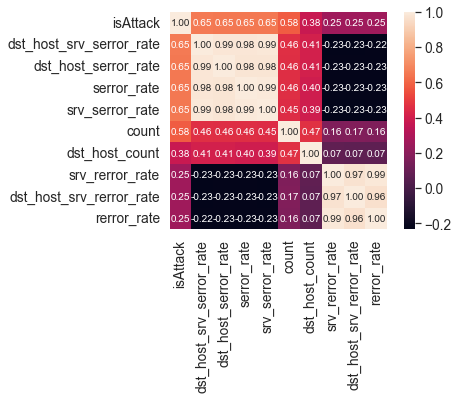

In [ ]:
k = 10 #number of variables for heatmap
corrmat = numeric_data.corr()
cols = corrmat.nlargest(k, 'isAttack')['isAttack'].index
cm = np.corrcoef(numeric_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

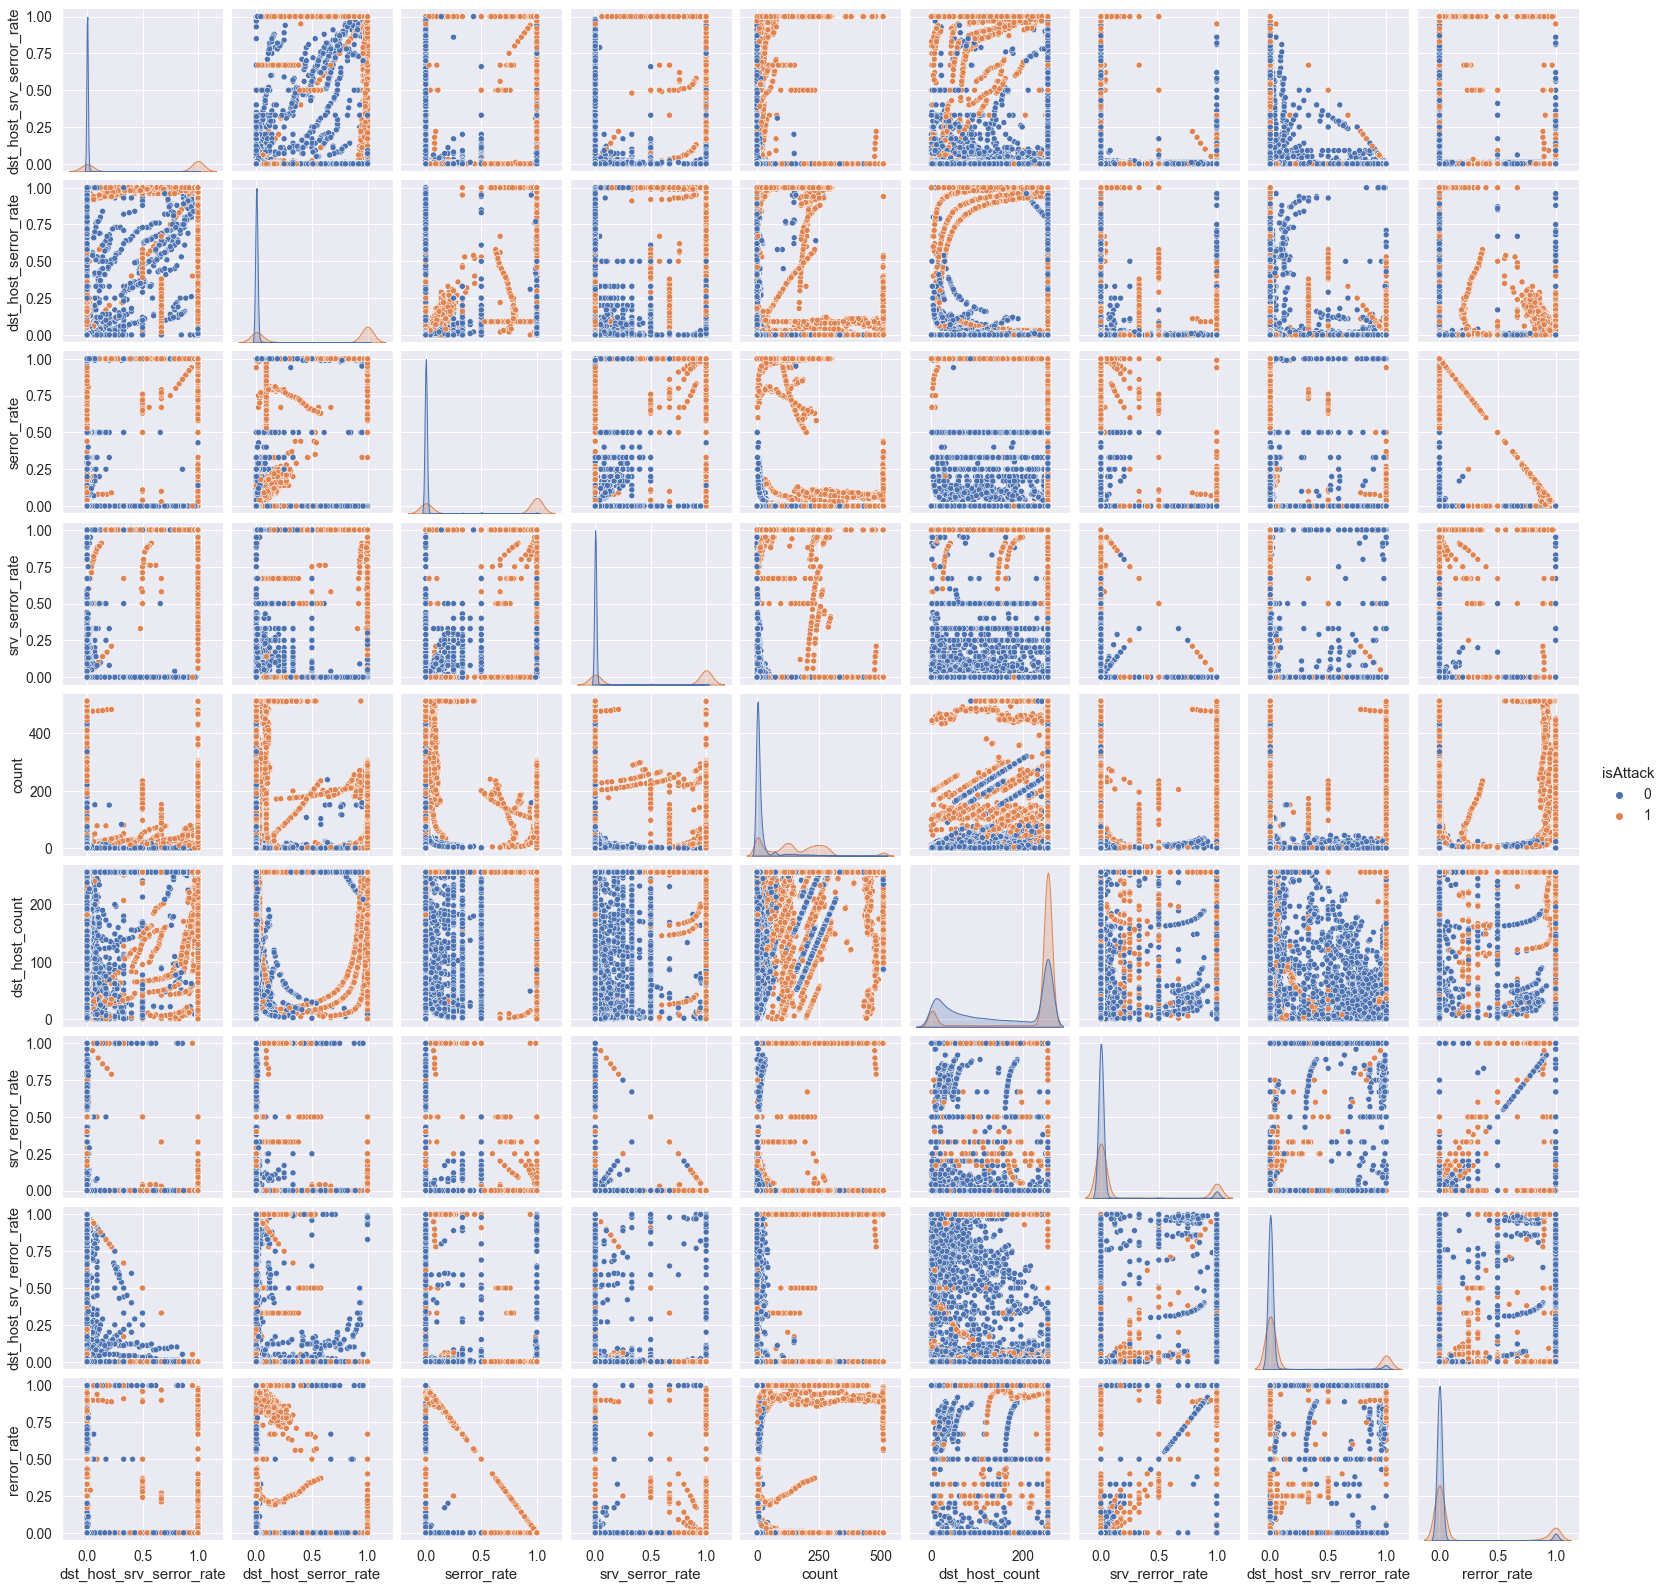

In [ ]:
sns.pairplot(numeric_data[cols],hue="isAttack")

## Cuantitativas de interes

In [ ]:
filtered_data = numeric_data[list(desiredCorr.index)[1:]]
filtered_data.head()

count  serror_rate  srv_serror_rate  same_srv_rate  dst_host_srv_count  \
0    2.0          0.0              0.0           1.00                25.0   
1   13.0          0.0              0.0           0.08                 1.0   
2  123.0          1.0              1.0           0.05                26.0   
3    5.0          0.2              0.2           1.00               255.0   
4   30.0          0.0              0.0           1.00               255.0   

   dst_host_same_srv_rate  dst_host_serror_rate  dst_host_srv_serror_rate  \
0                    0.17                  0.00                      0.00   
1                    0.00                  0.00                      0.00   
2                    0.10                  1.00                      1.00   
3                    1.00                  0.03                      0.01   
4                    1.00                  0.00                      0.00   

   isAttack  
0         0  
1         0  
2         1  
3         0  
4         0

count: Kurtosis: 2.0067893466227984 Skewness: 1.51425648765061 

serror_rate: Kurtosis: -1.0546098268185953 Skewness: 0.9631890428964239 

srv_serror_rate: Kurtosis: -1.044299959988806 Skewness: 0.9705856810983315 

same_srv_rate: Kurtosis: -1.609749542039288 Skewness: -0.5724926631603464 

dst_host_srv_count: Kurtosis: -1.7563128057623127 Skewness: 0.2837178091725708 

dst_host_same_srv_rate: Kurtosis: -1.8840187189033701 Skewness: -0.010447896247279353 

dst_host_serror_rate: Kurtosis: -1.0470016293720232 Skewness: 0.9659408137766112 

dst_host_srv_serror_rate: Kurtosis: -1.007999598605161 Skewness: 0.9917218217817211 

isAttack: Kurtosis: -1.9807724887371014 Skewness: 0.13866330178853242 



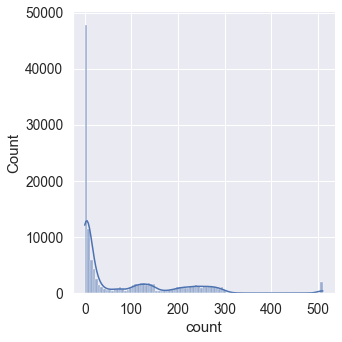

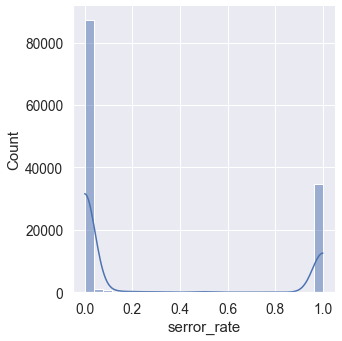

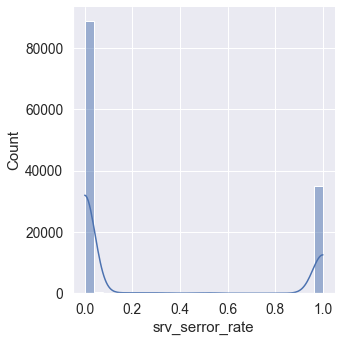

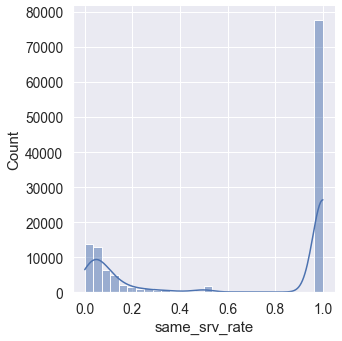

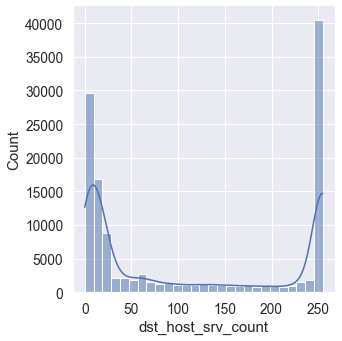

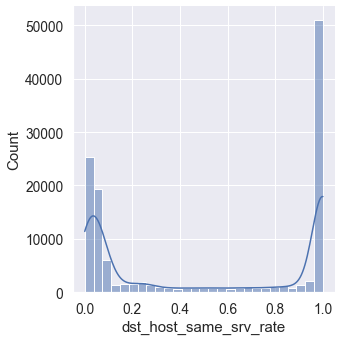

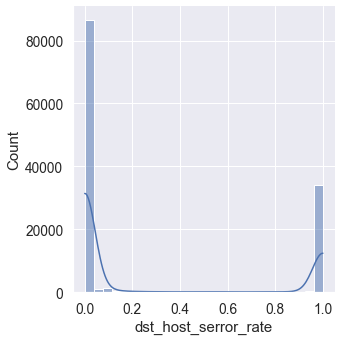

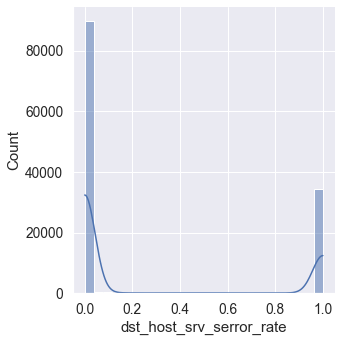

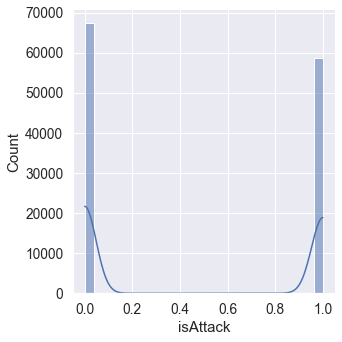

In [ ]:
for var in filtered_data:
    data = numeric_data[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

    # Mostrando normalidad
    print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')

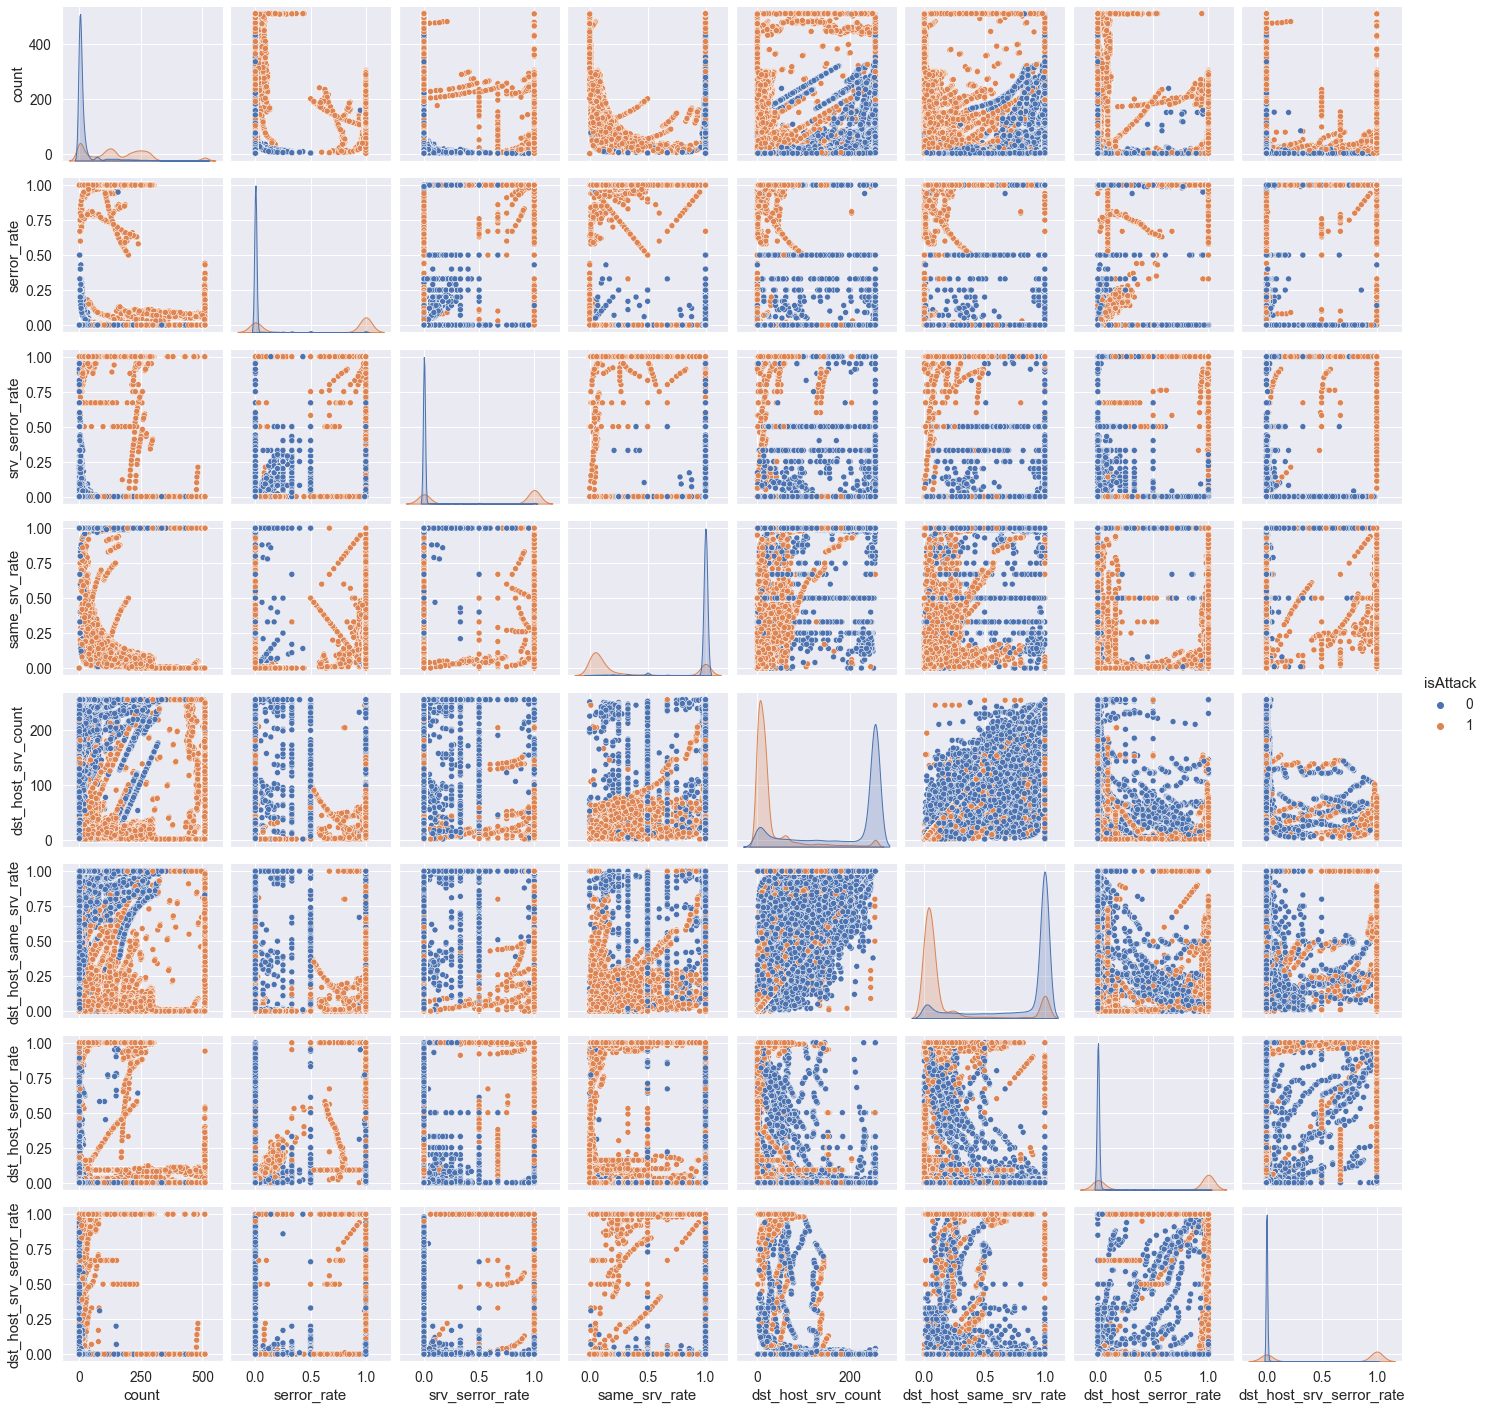

In [ ]:
sns.pairplot(numeric_data[filtered_data.columns],hue="isAttack")

## Categoricas

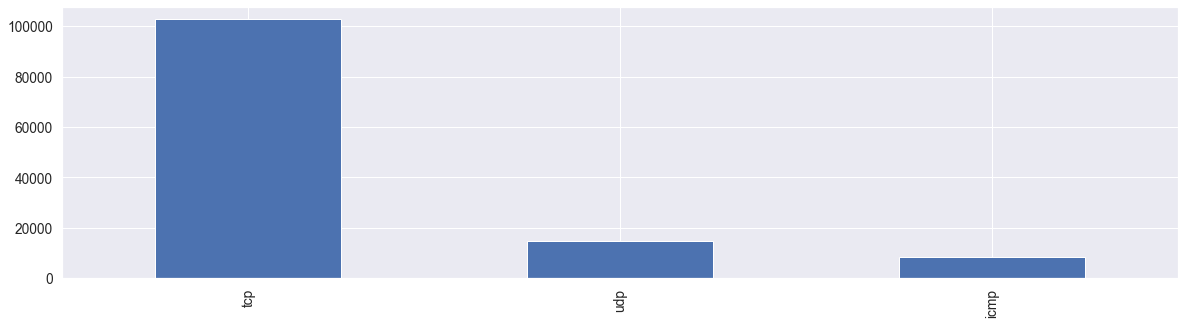

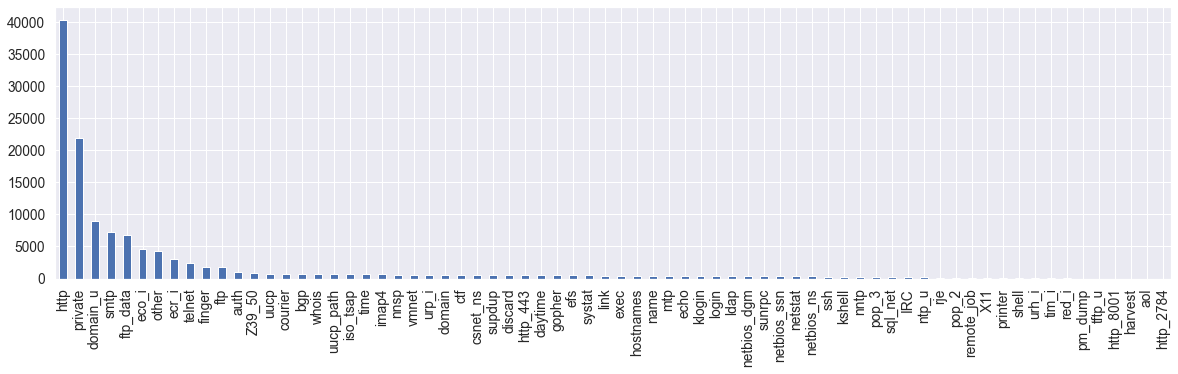

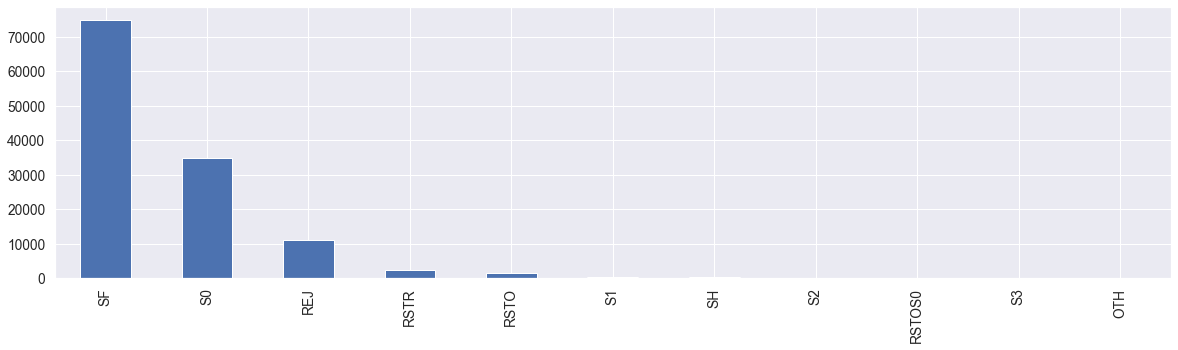

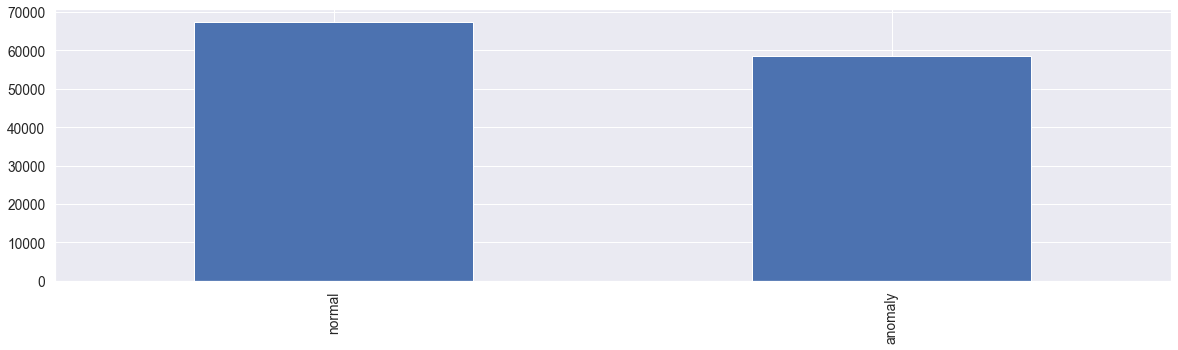

In [ ]:
for var in str_df:
  plt.figure(figsize=(20,5))
  str_df[var].value_counts().plot(kind='bar')
  plt.show()

# Final data

In [ ]:
final_data = pd.concat([str_df, filtered_data], axis=1)
print('Number of columns:', len(final_data.columns))
final_data.head()

Number of columns: 13


protocol_type   service flag    class  count  serror_rate  srv_serror_rate  \
0           tcp  ftp_data   SF   normal    2.0          0.0              0.0   
1           udp     other   SF   normal   13.0          0.0              0.0   
2           tcp   private   S0  anomaly  123.0          1.0              1.0   
3           tcp      http   SF   normal    5.0          0.2              0.2   
4           tcp      http   SF   normal   30.0          0.0              0.0   

   same_srv_rate  dst_host_srv_count  dst_host_same_srv_rate  \
0           1.00                25.0                    0.17   
1           0.08                 1.0                    0.00   
2           0.05                26.0                    0.10   
3           1.00               255.0                    1.00   
4           1.00               255.0                    1.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  isAttack  
0                  0.00                      0.00         0  
1                  0.00                      0.00         0  
2                  1.00                      1.00         1  
3                  0.03                      0.01         0  
4                  0.00                      0.00         0

## Report

In [ ]:
rpt = pf.ProfileReport(df)
rpt.to_file('./report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


## Analisis con Segundo Dataset

In [16]:
import pandas as pd

csv_files = ['ml1.csv', 'ml2.csv']

df_csv_append = pd.DataFrame()

df = pd.concat([pd.read_csv('datasets/dataset_phase2/'+file) for file in csv_files ], ignore_index=True)

# remove special character
df.columns = df.columns.str.replace(' ', '')

MemoryError: Unable to allocate 112. MiB for an array with shape (15, 975827) and data type int64

In [ ]:
import numpy as np

df["isAttack"] = df["Label"].apply(lambda x: 0 if x == 'BENIGN' else 1)
df = df.select_dtypes(include=np.number)
df.astype(np.number)

DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                49188.0           4.0              2.0                   0.0   
1                49188.0           1.0              2.0                   0.0   
2                49188.0           1.0              2.0                   0.0   
3                49188.0           1.0              2.0                   0.0   
4                49486.0           3.0              2.0                   0.0   
...                  ...           ...              ...                   ...   
1957127             80.0      590930.0              2.0                   0.0   
1957128             80.0     1187988.0              2.0                   0.0   
1957129             80.0          10.0              1.0                   9.0   
1957130            138.0          19.0             10.0                   0.0   
1957131             80.0     4751966.0              2.0                   0.0   

         TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                           12.0                      0.0                 6.0   
1                           12.0                      0.0                 6.0   
2                           12.0                      0.0                 6.0   
3                           12.0                      0.0                 6.0   
4                           12.0                      0.0                 6.0   
...                          ...                      ...                 ...   
1957127                      0.0                      0.0                 0.0   
1957128                      0.0                      0.0                 0.0   
1957129                      6.0                     54.0                 6.0   
1957130                   2370.0                      0.0               237.0   
1957131                      0.0                      0.0                 0.0   

         FwdPacketLengthMin  FwdPacketLengthMean  FwdPacketLengthStd  ...  \
0                       6.0                  6.0                 0.0  ...   
1                       6.0                  6.0                 0.0  ...   
2                       6.0                  6.0                 0.0  ...   
3                       6.0                  6.0                 0.0  ...   
4                       6.0                  6.0                 0.0  ...   
...                     ...                  ...                 ...  ...   
1957127                 0.0                  0.0                 0.0  ...   
1957128                 0.0                  0.0                 0.0  ...   
1957129                 6.0                  6.0                 0.0  ...   
1957130               237.0                237.0                 0.0  ...   
1957131                 0.0                  0.0                 0.0  ...   

         min_seg_size_forward  ActiveMean  ActiveStd  ActiveMax  ActiveMin  \
0                        20.0         0.0        0.0        0.0        0.0   
1                        20.0         0.0        0.0        0.0        0.0   
2                        20.0         0.0        0.0        0.0        0.0   
3                        20.0         0.0        0.0        0.0        0.0   
4                        20.0         0.0        0.0        0.0        0.0   
...                       ...         ...        ...        ...        ...   
1957127                  32.0         0.0        0.0        0.0        0.0   
1957128                  32.0         0.0        0.0        0.0        0.0   
1957129                  20.0         0.0        0.0        0.0        0.0   
1957130                  20.0         0.0        0.0        0.0        0.0   
1957131                  32.0         0.0        0.0        0.0        0.0   

         IdleMean  IdleStd  IdleMax  IdleMin  isAttack  
0             0.0      0.0      0.0      0.0       0.0  
1             0.0      0.0      0.0      0.0       0.0  
2             0.0      0.0    

In [ ]:
allCorrelations = df.corr()['isAttack']
desiredCorr = allCorrelations[abs(allCorrelations) > 0.4]
desiredCorr

FlowDuration            0.410064
BwdPacketLengthMax      0.621332
BwdPacketLengthMean     0.611734
BwdPacketLengthStd      0.641031
FlowIATStd              0.532269
FlowIATMax              0.608402
FwdIATTotal             0.411015
FwdIATStd               0.640034
FwdIATMax               0.609310
MaxPacketLength         0.601342
PacketLengthMean        0.541864
PacketLengthStd         0.620739
PacketLengthVariance    0.622642
AveragePacketSize       0.543234
AvgBwdSegmentSize       0.611734
IdleMean                0.612670
IdleMax                 0.614365
IdleMin                 0.608254
isAttack                1.000000
Name: isAttack, dtype: float64

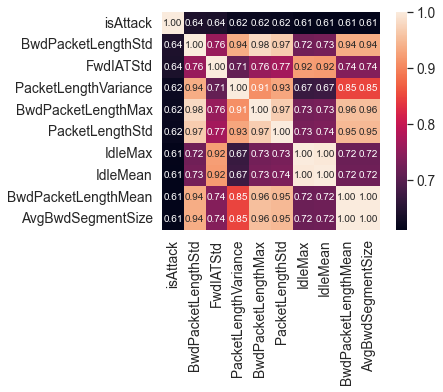

In [ ]:
import seaborn as sns

k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'isAttack')['isAttack'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
filtered_data = df[list(desiredCorr.index)]
filtered_data.head()

FlowDuration  BwdPacketLengthMax  BwdPacketLengthMean  BwdPacketLengthStd  \
0             4                   0                  0.0                 0.0   
1             1                   0                  0.0                 0.0   
2             1                   0                  0.0                 0.0   
3             1                   0                  0.0                 0.0   
4             3                   0                  0.0                 0.0   

   FlowIATStd  FlowIATMax  FwdIATTotal  FwdIATStd  FwdIATMax  MaxPacketLength  \
0         0.0           4            4        0.0          4                6   
1         0.0           1            1        0.0          1                6   
2         0.0           1            1        0.0          1                6   
3         0.0           1            1        0.0          1                6   
4         0.0           3            3        0.0          3                6   

   PacketLengthMean  PacketLengthStd  PacketLengthVariance  AveragePacketSize  \
0               6.0              0.0                   0.0                9.0   
1               6.0              0.0                   0.0                9.0   
2               6.0              0.0                   0.0                9.0   
3               6.0              0.0                   0.0                9.0   
4               6.0              0.0                   0.0                9.0   

   AvgBwdSegmentSize  IdleMean  IdleMax  IdleMin  isAttack  
0                0.0       0.0        0        0         0  
1                0.0       0.0        0        0         0  
2                0.0       0.0        0        0         0  
3                0.0       0.0        0        0         0  
4                0.0       0.0        0        0         0

In [ ]:
sns.pairplot(df[filtered_data.columns], hue="isAttack")

MemoryError: Unable to allocate 59.7 MiB for an array with shape (1957132, 4) and data type float64

Error in callback <function flush_figures at 0x000001A523A06D30> (for post_execute):


KeyboardInterrupt: 

 Bwd Packet Length Mean: Kurtosis: -0.16674294263396838 Skewness: 1.2043501780705828 

 Packet Length Mean: Kurtosis: -0.29538812934687453 Skewness: 1.1217244523995393 

 Average Packet Size: Kurtosis: -0.0034761098072508823 Skewness: 1.171632936177314 

isAttack: Kurtosis: -1.6842751772554512 Skewness: 0.5618939604093933 



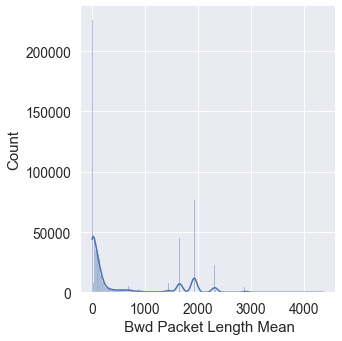

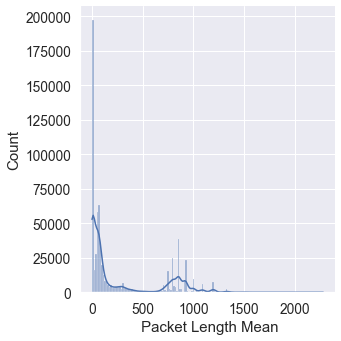

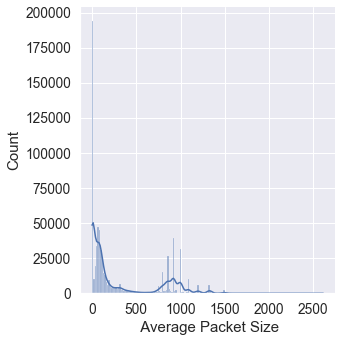

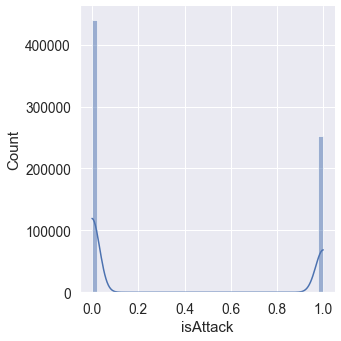

In [ ]:
for var in filtered_data:
    data = df[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

    # Mostrando normalidad
    print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')

In [ ]:
rpt = pf.ProfileReport(df)
rpt.to_file('./report.html')